Import Library yang diperlukan

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


Baca Dataset

In [21]:
df = pd.read_excel("Dataset_227(10F).xlsx")
df

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition,...,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
0,Laki-Laki,12-25 tahun,Pelajar/Mahasiswa,Olahraga,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Pasangan,SMA/SMK,Pernah,...,1,0,0,0,0,0,0,0,0,0
1,Perempuan,12-25 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Belum Pernah,...,1,0,0,1,0,0,0,0,0,0
2,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Keluarga,SMA/SMK,Pernah,...,1,1,0,1,0,0,0,1,0,0
3,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Belum Pernah,...,1,1,0,1,0,1,0,0,0,0
4,Laki-Laki,12-25 tahun,Pelajar/Mahasiswa,Olahraga,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Pernah,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Perempuan,26-45 tahun,Lainnya,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,S1/D1/D2/D3,Pernah,...,1,0,1,0,0,0,0,0,0,0
223,Laki-Laki,26-45 tahun,Lainnya,Berenang,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,SMA/SMK,Pernah,...,0,1,0,0,0,0,0,0,0,0
224,Laki-Laki,26-45 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Pasangan,S1/D1/D2/D3,Pernah,...,0,0,0,0,0,0,0,0,0,1
225,Laki-Laki,26-45 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,S1/D1/D2/D3,Pernah,...,1,0,0,0,0,0,0,0,0,0


Melihat informasi kolom dan tipe data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jenis_kelamin        227 non-null    object
 1   umur                 227 non-null    object
 2   pekerjaan            227 non-null    object
 3   hobi                 227 non-null    object
 4   tujuan_berwisata     227 non-null    object
 5   status_perkawinan    227 non-null    object
 6   daerah_asal          227 non-null    object
 7   teman_perjalanan     227 non-null    object
 8   pendidikan_terakhir  227 non-null    object
 9   repetition           227 non-null    object
 10  Y1                   227 non-null    int64 
 11  Y2                   227 non-null    int64 
 12  Y3                   227 non-null    int64 
 13  Y4                   227 non-null    int64 
 14  Y5                   227 non-null    int64 
 15  Y6                   227 non-null    int64 
 16  Y7      

Dari info diatas, tidak ada keberadaan missing value / NaN.

In [23]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(include=['int64']).columns)

Memisahkan kolom yang bertipe objek (category) dengan yang numeric (eg. float,int, dll)

In [24]:
df[cats].describe()

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition
count,227,227,227,227,227,227,227,227,227,227
unique,2,4,4,5,4,2,2,5,4,2
top,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Kota Batu,Keluarga,SMA/SMK,Pernah
freq,144,140,91,113,215,142,115,115,152,137


In [25]:
df[nums].describe()

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000
mean,0.612335,0.638767,0.568282,0.502203,0.511013,0.374449,0.286344,0.541850,0.140969,0.268722,0.193833,0.171806,0.105727,0.08370
std,0.488294,0.481420,0.496410,0.501100,0.500983,0.485050,0.453051,0.499347,0.348759,0.444275,0.396173,0.378046,0.308167,0.27755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
# cek data duplikat

df.duplicated().sum()

2

Ternyata terdapat 2 data yang duplikat, bisa kita hapus salah satunya saja

In [27]:
df.drop_duplicates(keep='first', inplace=True)

In [28]:
df.duplicated().sum()

0

Sudah tidak ada yang duplikat

##Mulai tahapan membuat model ML

###1. Mengubah tipe data string ke dalam label numeric agar lebih mudah dipahami ML

In [29]:
for col in cats:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [30]:
df.head()

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition,...,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
0,0,0,2,3,3,0,1,1,2,1,...,1,0,0,0,0,0,0,0,0,0
1,1,0,3,4,3,0,1,4,2,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,2,4,3,0,1,0,2,1,...,1,1,0,1,0,0,0,1,0,0
3,1,0,2,4,3,0,1,4,2,0,...,1,1,0,1,0,1,0,0,0,0
4,0,0,2,3,3,0,1,4,2,1,...,0,1,1,1,0,0,0,0,0,0


###2. Memisahkan antara fitur dan target

In [31]:
X = df[cats]
y = df[nums]

###3. Memisahkan data training dan testing set (sebesar 80% training, 20% testing)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###4. Scaling fitur umur menjadi numeric

In [33]:
num_cols = ['umur']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [34]:
num_categories = [len(df[col].unique()) for col in cats]

###5. Model algoritma NCF

In [35]:
def create_ncf_model(num_categories, latent_dim, hidden_dim):
    input_layers = []
    embedding_layers = []

    for num in num_categories:
        input_layer = Input(shape=(1,))
        embedding_layer = Embedding(num, latent_dim)(input_layer)
        flatten_layer = Flatten()(embedding_layer)
        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    repetition_input = Input(shape=(1,))
    repetition_embedding = Embedding(num_categories[-1], latent_dim)(repetition_input)
    repetition_flatten = Flatten()(repetition_embedding)
    embedding_layers.append(repetition_flatten)

    concat = Concatenate()(embedding_layers)
    x = Dense(hidden_dim, activation='relu')(concat)
    x = Dropout(0.2)(x)
    x = Dense(hidden_dim, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(14, activation='sigmoid')(x)

    model = Model(inputs=input_layers + [repetition_input], outputs=output)
    return model

###6. Membuat model

In [36]:
latent_dim = 20
hidden_dim = 50

model = create_ncf_model(num_categories, latent_dim, hidden_dim)

In [37]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

###7. Mulai training model

In [38]:
history = model.fit([X_train[col] for col in cats] + [X_train['repetition']],
                    y_train, batch_size=64, epochs=50,
                    validation_data=([X_test[col] for col in cats] + [X_test['repetition']], y_test),
                    verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 179ms/step - loss: 0.6910 - accuracy: 0.1389 - val_loss: 0.6874 - val_accuracy: 0.2667
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 0.6846 - accuracy: 0.2111 - val_loss: 0.6822 - val_accuracy: 0.2667
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 0.6790 - accuracy: 0.2222 - val_loss: 0.6760 - val_accuracy: 0.2667
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6725 - accuracy: 0.2556 - val_loss: 0.6688 - val_accuracy: 0.2667
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6646 - accuracy: 0.2556 - val_loss: 0.6606 - val_accuracy: 0.2667
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.6537 - accuracy: 0.2889 - val_loss: 0.6512 - val_accuracy: 0.2667
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.6442 - accuracy: 0.2444 - val_loss: 0.6416 - val_accuracy: 0.2667
Epoch 8/50
3/3 [==========

In [39]:
loss, accuracy = model.evaluate([X_test[col] for col in cats] + [X_test['repetition']], y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

2/2 [==============================] - 0s 7ms/step - loss: 0.6041 - accuracy: 0.3333
Accuracy: 33.33%


####Compile model dengan metric MAE dan RMSE

In [40]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
)

In [41]:
history = model.fit([X_train[col] for col in cats] + [X_train['repetition']],
                    y_train, batch_size=64, epochs=50,
                    validation_data=([X_test[col] for col in cats] + [X_test['repetition']], y_test),
                    verbose=1)

Epoch 1/50
3/3 [==============================] - 3s 166ms/step - loss: 0.1858 - mean_absolute_error: 0.3767 - root_mean_squared_error: 0.4311 - val_loss: 0.2084 - val_mean_absolute_error: 0.3878 - val_root_mean_squared_error: 0.4565
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.1851 - mean_absolute_error: 0.3738 - root_mean_squared_error: 0.4303 - val_loss: 0.2090 - val_mean_absolute_error: 0.3863 - val_root_mean_squared_error: 0.4571
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 0.1857 - mean_absolute_error: 0.3686 - root_mean_squared_error: 0.4309 - val_loss: 0.2091 - val_mean_absolute_error: 0.3876 - val_root_mean_squared_error: 0.4573
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 0.1846 - mean_absolute_error: 0.3708 - root_mean_squared_error: 0.4297 - val_loss: 0.2092 - val_mean_absolute_error: 0.3891 - val_root_mean_squared_error: 0.4574
Epoch 5/50
3/3 [==============================] - 0s 23ms/step - lo

In [42]:
loss, mae, rmse = model.evaluate([X_test[col] for col in cats] + [X_test['repetition']], y_test)

print(f'\nMAE: {mae}\n RMSE: {rmse}')

2/2 [==============================] - 0s 13ms/step - loss: 0.2118 - mean_absolute_error: 0.3873 - root_mean_squared_error: 0.4602

MAE: 0.3873310387134552
 RMSE: 0.46019789576530457


#####Apakah data row yang hanya berisi 255 data mungkin bisa membuat performa tidak meningkat?

Ya, ukuran dataset yang kecil bisa menjadi faktor yang mempengaruhi performa model, terutama jika model memiliki banyak parameter (seperti pada Neural Collaborative Filtering dengan banyak node embedding, hidden layers, dll.) atau jika dataset memiliki kompleksitas yang tinggi.

Berikut adalah beberapa alasan mengapa ukuran dataset yang kecil dapat mempengaruhi performa model:

1. Kurangnya Informasi:
Dengan jumlah data yang terbatas, model mungkin kesulitan untuk menemukan pola yang signifikan atau mewakili kecenderungan yang ada di dalam dataset.

<Axes: >

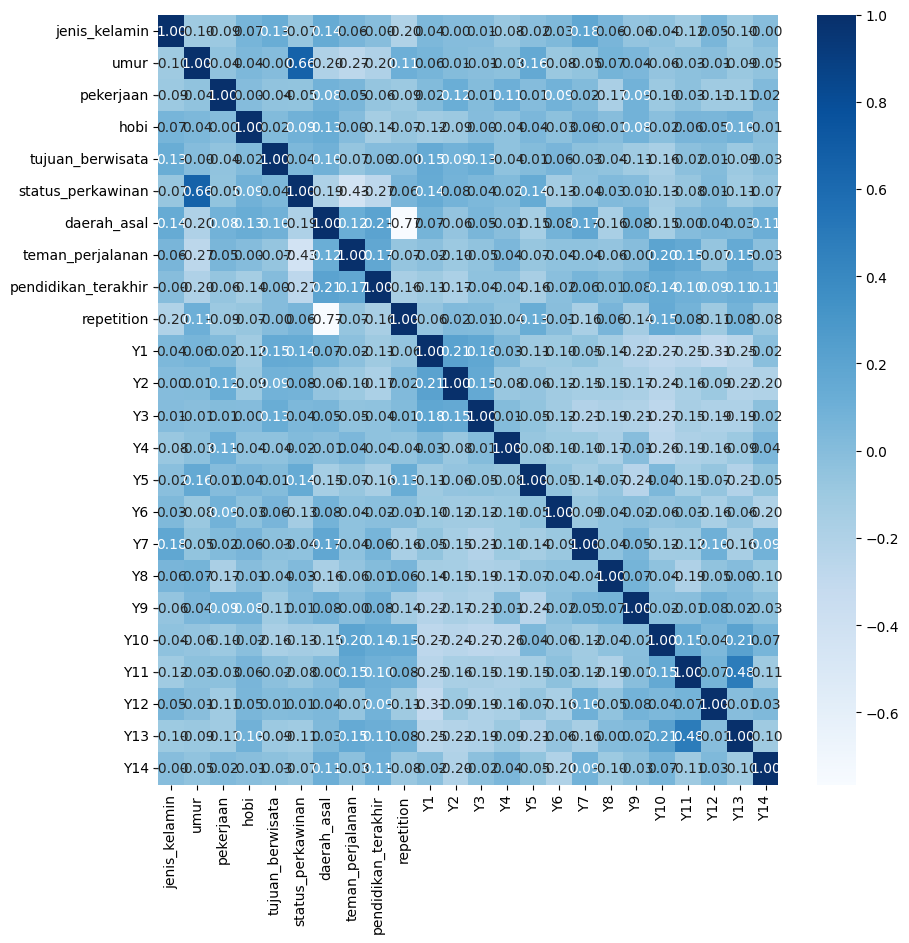

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')